`Dimensionality reduction` methods are used to reduce the number of independent features used for building a ML model.

It helps by the below factors
 - Lower `storage` space
 - Less `computation` cost
 - Enables usage of some algorithms
 - Handles `multicollinearity`
 - Less chances of `overfitting` (More features, worse generalization)

Mainly, below are 2 types of dimensionality reduction

1. **Feature Selection[Allows us to select some of original features]**
   * `Missing` Value Ratio - Remove features with high number(depends) of missing values.
   * Low `Variance` Filter - Remove features which show no ro almost no variance.
   * High `Correlation` Filter - Remove a feature that is highly correlated (depends) with another feature.
   * Random Forest - tree based algorithms use Gini, Entropy to split at nodes. Same can be used for feature selection.
   * `Backward` Selection - Use all features to build model, remove the feature that results is least performance drop and repeat.
   * `Forward` Selection - Start with one feature retain the feature with highest performance and repeat.
3. **Feature Extraction[Does not result in a subset of original features but give new dimensions of importance]**
   * Component based
        * Factor Analysis
        * Principal Component Analysis
        * Independent Component Analysis

     
   * Projection based
        * ISOMAP
        * t-SNE
        * UMAP
   

### Backward Feature Elimination

Use all features to build model, remove the feature that results is least performance drop and repeat.

In [8]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
print("Full set of features", X.columns.to_list())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Backward feature elimination
sfs = SFS(model,
          k_features=5,              # Select top 5 features
          forward=False,             # Backward elimination
          floating=False,            # No floating search
          scoring='accuracy',        # Eliminate based on least drop in accuracy
          cv=5)

sfs = sfs.fit(X_train, y_train)

# Selected features

print("\nSelected features:", list(sfs.k_feature_names_))


Full set of features ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Selected features: ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'flavanoids', 'hue']


### Forward Feature Selection

Start with one feature retain the feature with highest performance and repeat.

In [9]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
print("Full set of features", X.columns.to_list())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Backward feature elimination
sfs = SFS(model,
          k_features=5,              # Select top 5 features
          forward=True,             # Forward selection
          floating=False,            # No floating search
          scoring='accuracy',        # Eliminate based on least drop in accuracy
          cv=5)

sfs = sfs.fit(X_train, y_train)

# Selected features

print("\nSelected features:", list(sfs.k_feature_names_))


Full set of features ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Selected features: ['alcohol', 'malic_acid', 'flavanoids', 'nonflavanoid_phenols', 'color_intensity']


### Random Forest 
Tree based algorithms use  
`Gini` Impurity, `Entropy`(Information Gain) in case if classification   
and  
`variance` reduction, mean squared error in case of regression 

to split the data at each node.

The same set of metrics can be used to get the feature importance.

             Feature  Importance
2  petal length (cm)    0.436130
3   petal width (cm)    0.436065
0  sepal length (cm)    0.106128
1   sepal width (cm)    0.021678


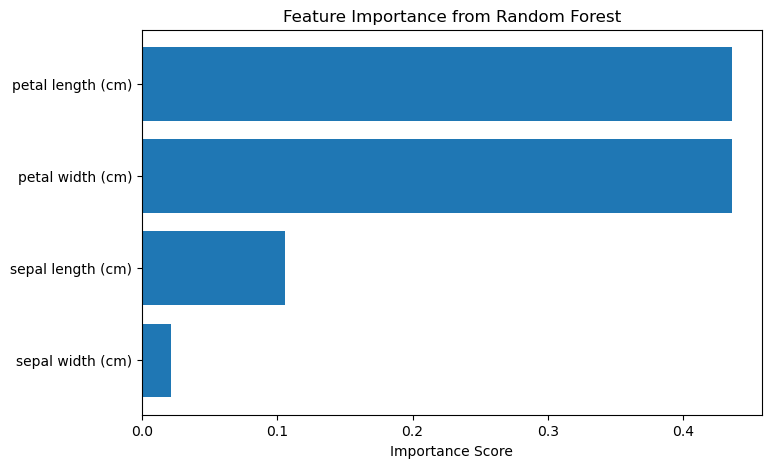

In [11]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the ranked features
print(feature_importance_df)

# Optional: Plot the feature importances
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])



plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

### Principal Component Analysis 

PCA tries to reduce the dimensioality by a form of feature engineering. It combines all the variables into few principal components. Out of the few, we can select minimum number of components so that it covers most of the variance in the data. 

If we have 2 variables and if we want to reduce it to 1 variable, we can take the average or sum or difference between the two variables.

|                Var 1      |  Var 2 | Average(Var 1 + Var 2)/2 |
|----------------------|--------------------|--------------------|
|2 | 4 | 3|
|3 | 3 | 3|
|8 | 2 | 5|
|4 | 6 | 5|

But taking Average aa a final variable does not ensure that we are capturing most of the variance fro var 1 and Var 2. So, PCA aims at `finding the aggregation` (linear combination like average) that reduces the dataset into one variable but ensures that it `retains most of the variance` in the data. 

For a dataset of n variables, we can calculate upto n Principal Components (or n linear combinations of variables) but we can use just few of them as these combinations will capture most of the variance in the data.

**Steps:**

`Standardize` the Data Ensure each feature has mean = 0 and standard deviation = 1

Compute the `Covariance Matrix` This shows how variables vary together

Calculate Eigenvectors and Eigenvalues

`Eigenvectors`: directions of the new axes (principal components)

`Eigenvalues`: magnitude of variance captured by each component

Sort and `Select` Principal Components Choose the top components that explain most of the variance

`Transform` the Data Project the original data onto the new principal component axes

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2) # find only 2 components
principal_components = pca.fit_transform(X_scaled)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

print("Principal Components DataFrame(5 rows):")
print(pca_df.head())
print("\n")

# 4. Explained Variance Ratio
# This tells us how much variance each principal component captures.
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio of Principal Components:")
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.1%}")

Principal Components DataFrame(5 rows):
   Principal Component 1  Principal Component 2
0              -2.264703               0.480027
1              -2.080961              -0.674134
2              -2.364229              -0.341908
3              -2.299384              -0.597395
4              -2.389842               0.646835


Explained Variance Ratio of Principal Components:
Principal Component 1: 73.0%
Principal Component 2: 22.9%
